# Predict students' dropout and academic success Analysis

## Introduction

### The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. The dataset contains 37 columns and 4424 rows, the dataset includes information known at the time of student enrollment which were grouped into 7 different factors such as academic factor, demographics factor, application factor, financial factor, enrollment factor, macroeconomic factor and social-economic factors.

#### DATA WRANGLING

In [207]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sbn

%matplotlib inline

In [208]:
#Load dataset into a pandas dataframe
df = pd.read_csv('Student_Academic_Prediction.csv', sep = ';')
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [209]:
#Check the information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [210]:
#check for the rows and columns
df.shape

(4424, 37)

#### DATA CLEANING

In [211]:
#creating a copy of the dataframe
df_clean = df.copy()

In [212]:
#create a column to decode the Marital status encoding
Marital_status = {1: "single", 2: "married", 3: "widower", 4: "divorced", 
            5: "facto union", 6: "legally separated"}

df_clean['Marital_status'] = df_clean['Marital status'].replace(Marital_status)
df_clean.Marital_status.unique()

array(['single', 'married', 'divorced', 'widower', 'facto union',
       'legally separated'], dtype=object)

In [213]:
#create a column to decode the course encoding
Course = {33: "Biofuel Production Technologies", 171: "Animation and Multimedia Design",
          8014: "Social Service (evening attendance)", 9003: "Agronomy", 9070: "Communication Design",
          9085: "Veterinary Nursing", 9119: "Informatics Engineering", 9130: "Equinculture",
          9147: "Management", 9238: "Social Service", 9254: "Tourism", 9500: "Nursing", 9556: "Oral Hygiene",
          9670: "Advertising and Marketing Management",
          9773: "Journalism and Communication", 9853: "Basic Education", 9991: "Management (evening attendance)"}

df_clean['Course'] = df_clean['Course'].replace(Course)
df_clean.Course.unique()

array(['Animation and Multimedia Design', 'Tourism',
       'Communication Design', 'Journalism and Communication',
       'Social Service (evening attendance)',
       'Management (evening attendance)', 'Nursing', 'Social Service',
       'Advertising and Marketing Management', 'Basic Education',
       'Veterinary Nursing', 'Equinculture', 'Oral Hygiene', 'Management',
       'Agronomy', 'Biofuel Production Technologies',
       'Informatics Engineering'], dtype=object)

In [214]:
#create a column to decode the Previous qualification encoding
Previous_qualification = {1: "Secondary education", 2: "Higher education - bachelor's degree", 3: "Higher education - degree",
                          4: "Higher education - master's", 5: "Higher education - doctorate", 6: "Frequency of higher education",
                          9: "12th year of schooling - not completed", 10: "11th year of schooling - not completed",
                          12: "Other - 11th year of schooling", 14: "10th year of schooling",
                          15: "10th year of schooling - not completed",
                          19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.", 
                          38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
                          39: "Technological specialization course", 40: "Higher education - degree (1st cycle)",
                          42: "Professional higher technical course", 43: "Higher education - master (2nd cycle)"}

df_clean['Previous_qualification'] = df_clean['Previous qualification'].replace(Previous_qualification)
df_clean.Previous_qualification.unique()

array(['Secondary education',
       'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
       'Professional higher technical course',
       'Technological specialization course',
       '11th year of schooling - not completed',
       'Higher education - degree',
       'Higher education - degree (1st cycle)',
       "Higher education - bachelor's degree",
       "Higher education - master's", 'Other - 11th year of schooling',
       'Higher education - master (2nd cycle)',
       '10th year of schooling - not completed',
       'Frequency of higher education',
       '12th year of schooling - not completed',
       'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
       'Higher education - doctorate', '10th year of schooling'],
      dtype=object)

In [215]:
#create a column to decode the Nationality encoding
df_clean.rename(columns={'Nacionality':'Nationality'}, inplace = True)
Nationality = {1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian", 13: "Dutch",
              14: "English", 17: "Lithuanian", 21: "Angolan", 22: "Cape Verdean", 24: "Guinean",
               25: "Mozambican", 26: "Santomean", 32: "Turkish", 41: "Brazilian", 62: "Romanian",
               100: "Moldova (Republic of)", 101: "Mexican", 103: "Ukrainian", 105: "Russian", 108: "Cuban", 109: "Colombian"}

df_clean['Nationality'] = df_clean['Nationality'].replace(Nationality)
df_clean.Nationality.unique()

array(['Portuguese', 'Romanian', 'Spanish', 'Brazilian', 'Santomean',
       'Ukrainian', 'Dutch', 'Mozambican', 'Angolan', 'Mexican',
       'Italian', 'Cape Verdean', 'Turkish', 'Moldova (Republic of)',
       'Guinean', 'Colombian', 'German', 'Cuban', 'Russian', 'English',
       'Lithuanian'], dtype=object)

In [216]:
#create a column to decode the Mother's qualification encoding
Mother_qualification = {1: "Secondary Education - 12th Year of Schooling or Eq.",
                        2: "Higher Education - Bachelor's Degree", 3: "Higher Education - Degree",
                        4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
                        6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed",
                        10: "11th Year of Schooling - Not Completed", 11: "7th Year (Old)",
                        12: "Other - 11th Year of Schooling", 14: "10th Year of Schooling", 18: "General commerce course",
                        19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.", 22: "Technical-professional course",
                        26: "7th year of schooling", 27: "2nd cycle of the general high school course",
                        29: "9th Year of Schooling - Not Completed", 30: "8th year of schooling",
                        34: "Unknown", 35: "Can't read or write", 36: "Can read without having a 4th year of schooling",
                        37: "Basic education 1st cycle (4th/5th year) or equiv.",
                        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
                        39: "Technological specialization course", 40: "Higher education - degree (1st cycle)",
                        41: "Specialized higher studies course", 42: "Professional higher technical course",
                        43: "Higher Education - Master (2nd cycle)", 44: "Higher Education - Doctorate (3rd cycle)"}

df_clean['Mother_qualification'] = df_clean['Mother\'s qualification'].replace(Mother_qualification)
df_clean.Mother_qualification.unique()

array(['Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
       'Secondary Education - 12th Year of Schooling or Eq.',
       'Basic education 1st cycle (4th/5th year) or equiv.',
       'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
       'Higher Education - Degree', "Higher Education - Master's",
       'Professional higher technical course',
       "Higher Education - Bachelor's Degree", 'Unknown',
       'Other - 11th Year of Schooling',
       'Higher education - degree (1st cycle)',
       '12th Year of Schooling - Not Completed',
       'Higher Education - Doctorate',
       'Technological specialization course', '7th Year (Old)',
       'Specialized higher studies course', '8th year of schooling',
       '10th Year of Schooling', "Can't read or write",
       'Can read without having a 4th year of schooling',
       'Frequency of Higher Education',
       '11th Year of Schooling - Not Completed',
       '9th Year of Schooling - Not Completed',
       'High

In [217]:
#create a column to decode the Father's qualification encoding
Father_qualification = {1: "Secondary Education - 12th Year of Schooling or Eq.", 2: "Higher Education - Bachelor's Degree",
                        3: "Higher Education - Degree",4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
                        6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed",
                        10: "11th Year of Schooling - Not Completed", 11: "7th Year (Old)", 12: "Other - 11th Year of Schooling",
                        13: "2nd year complementary high school course", 14: "10th Year of Schooling",
                        18: "General commerce course", 19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.", 
                        20: "Complementary High School Course", 22: "Technical-professional course", 
                        25: "Complementary High School Course - not concluded", 26: "7th year of schooling",
                        27: "2nd cycle of the general high school course", 29: "9th Year of Schooling - Not Completed",
                        30: "8th year of schooling", 31: "General Course of Administration and Commerce", 
                        33: "Supplementary Accounting and Administration", 34: "Unknown", 35: "Can't read or write",
                        36: "Can read without having a 4th year of schooling",
                        37: "Basic education 1st cycle (4th/5th year) or equiv.",
                        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.", 39: "Technological specialization course",
                        40: "Higher education - degree (1st cycle)", 41: "Specialized higher studies course",
                        42: "Professional higher technical course", 43: "Higher Education - Master (2nd cycle)",
                        44: "Higher Education - Doctorate (3rd cycle)"}
df_clean['Father_qualification'] = df_clean['Father\'s qualification'].replace(Father_qualification)
df_clean.Father_qualification.unique()

array(['Other - 11th Year of Schooling', 'Higher Education - Degree',
       'Basic education 1st cycle (4th/5th year) or equiv.',
       'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
       'Secondary Education - 12th Year of Schooling or Eq.',
       'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
       'Higher Education - Doctorate', "Higher Education - Master's",
       'Unknown', "Higher Education - Bachelor's Degree",
       'Technological specialization course', '7th Year (Old)',
       '12th Year of Schooling - Not Completed',
       'Can read without having a 4th year of schooling',
       '7th year of schooling', 'Higher education - degree (1st cycle)',
       '10th Year of Schooling', 'Complementary High School Course',
       "Can't read or write", 'Specialized higher studies course',
       'Technical-professional course',
       '2nd year complementary high school course',
       '9th Year of Schooling - Not Completed',
       'Higher Education - 

In [218]:
#create a column to decode the Mother's occupation encoding
Mother_occupation = {0: "Student",
                     1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
                     2: "Specialists in Intellectual and Scientific Activities", 3: "Intermediate Level Technicians and Professions",
                     4: "Administrative staff", 5: "Personal Services, Security and Safety Workers and Sellers",
                     6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry", 
                     7: "Skilled Workers in Industry, Construction and Craftsmen",
                     8: "Installation and Machine Operators and Assembly Workers", 9: "Unskilled Workers",
                     10: "Armed Forces Professions", 90: "Other Situation", 99: "(blank)", 122: "Health professionals",
                     123: "teachers", 125: "Specialists in information and communication technologies (ICT)",
                     131: "Intermediate level science and engineering technicians and professions",
                     132: "Technicians and professionals, of intermediate level of health",
                     134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
                     141: "Office workers, secretaries in general and data processing operators",
                     143: "Data, accounting, statistical, financial services and registry-related operators",
                     144: "Other administrative support staff", 151: "personal service workers", 152: "sellers",
                     153: "Personal care workers and the like",
                     171: "Skilled construction workers and the like, except electricians",
                     173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
                     175: "Workers in food processing, woodworking, clothing and other industries and crafts",
                     191: "cleaning workers", 
                     192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
                     193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
                     194: "Meal preparation assistants"}
df_clean['Mother_occupation'] = df_clean['Mother\'s occupation'].replace(Mother_occupation)
df_clean.Mother_occupation.unique()

array(['Personal Services, Security and Safety Workers and Sellers',
       'Intermediate Level Technicians and Professions',
       'Unskilled Workers',
       'Skilled Workers in Industry, Construction and Craftsmen',
       'Administrative staff',
       'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
       'Specialists in information and communication technologies (ICT)',
       'Student',
       'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
       'Specialists in Intellectual and Scientific Activities',
       'Other Situation',
       'Installation and Machine Operators and Assembly Workers',
       'Office workers, secretaries in general and data processing operators',
       'Workers in food processing, woodworking, clothing and other industries and crafts',
       '(blank)', 'cleaning workers', 'personal service workers',
       'Meal preparation assistants',
       'Unskilled workers in agr

In [219]:
#create a column to decode the Father's qualification encoding
Father_occupation = {0: "Student",
                     1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
                     2: "Specialists in Intellectual and Scientific Activities",
                     3: "Intermediate Level Technicians and Professions", 4: "Administrative staff",
                     5: "Personal Services, Security and Safety Workers and Sellers",
                     6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
                     7: "Skilled Workers in Industry, Construction and Craftsmen", 8: "Installation and Machine Operators and Assembly Workers",
                     9: "Unskilled Workers", 10: "Armed Forces Professions", 90: "Other Situation", 99: "(blank)", 101: "Armed Forces Officers",
                     102: "Armed Forces Sergeants", 103: "Other Armed Forces personnel", 
                     112: "Directors of administrative and commercial services", 114: "Hotel, catering, trade and other services directors",
                     121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
                     122: "Health professionals", 123: "teachers", 
                     124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
                     131: "Intermediate level science and engineering technicians and professions",
                     132: "Technicians and professionals, of intermediate level of health", 
                     134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
                     135: "Information and communication technology technicians",
                     141: "Office workers, secretaries in general and data processing operators",
                     143: "Data, accounting, statistical, financial services and registry-related operators",
                     144: "Other administrative support staff", 151: "personal service workers", 152: "sellers",
                     153: "Personal care workers and the like", 154: "Protection and security services personnel",
                     161: "Market-oriented farmers and skilled agricultural and animal production workers",
                     163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
                     171: "Skilled construction workers and the like, except electricians",
                     172: "Skilled workers in metallurgy, metalworking and similar",
                     174: "Skilled workers in electricity and electronics",
                     175: "Workers in food processing, woodworking, clothing and other industries and crafts",
                     181: "Fixed plant and machine operators", 182: "assembly workers",
                     183: "Vehicle drivers and mobile equipment operators",
                     192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
                     193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
                     194: "Meal preparation assistants", 195: "Street vendors (except food) and street service providers"}
df_clean['Father_occupation'] = df_clean['Father\'s occupation'].replace(Father_occupation)
df_clean.Father_occupation.unique()

array(['Unskilled Workers',
       'Intermediate Level Technicians and Professions',
       'Skilled Workers in Industry, Construction and Craftsmen',
       'Armed Forces Professions',
       'Personal Services, Security and Safety Workers and Sellers',
       'Installation and Machine Operators and Assembly Workers',
       'Administrative staff',
       'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
       'Specialists in Intellectual and Scientific Activities',
       'Specialists in finance, accounting, administrative organization, public and commercial relations',
       'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
       'Student', 'Other Situation',
       'Workers in food processing, woodworking, clothing and other industries and crafts',
       'Specialists in the physical sciences, mathematics, engineering and related techniques',
       '(blank)', 'Other administrative support staff',
  

In [220]:
#create a column to decode the Application order encoding
Application_order = {0: "first choice", 1: "second choice", 2: "third choice", 3: "fourth choice", 4: "fifth choice",
                     5: "sixth choice", 6: "seventh choice", 7: "eighth choice", 8: "ninth choice", 9: "last choice"}
df_clean['Application_order'] = df_clean['Application order'].replace(Application_order)
df_clean.Application_order.unique()

array(['sixth choice', 'second choice', 'third choice', 'fifth choice',
       'fourth choice', 'seventh choice', 'last choice', 'first choice'],
      dtype=object)

In [221]:
#create a column to decode the Application mode encoding
Application_mode = {1: "1st phase - general contingent", 2: "Ordinance No. 612/93",
                    5: "1st phase - special contingent (Azores Island)", 7: "Holders of other higher courses",
                    10: "Ordinance No. 854-B/99", 15: "International student (bachelor)",
                    16: "1st phase - special contingent (Madeira Island)", 17: "2nd phase - general contingent",
                    18: "3rd phase - general contingent", 26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
                    27: "Ordinance No. 533-A/99, item b3 (Other Institution)", 39: "Over 23 years old", 42: "Transfer",
                    43: "Change of course", 44: "Technological specialization diploma holders",
                    51: "Change of institution/course", 53: "Short cycle diploma holders",
                    57: "Change of institution/course (International)"}
df_clean['Application_mode'] = df_clean['Application mode'].replace(Application_mode)
df_clean.Application_mode.unique()

array(['2nd phase - general contingent',
       'International student (bachelor)',
       '1st phase - general contingent', 'Over 23 years old',
       '3rd phase - general contingent', 'Short cycle diploma holders',
       'Technological specialization diploma holders',
       'Change of institution/course', 'Change of course',
       'Holders of other higher courses', 'Transfer',
       '1st phase - special contingent (Madeira Island)',
       '1st phase - special contingent (Azores Island)',
       'Ordinance No. 612/93', 'Ordinance No. 854-B/99',
       'Change of institution/course (International)',
       'Ordinance No. 533-A/99, item b2) (Different Plan)',
       'Ordinance No. 533-A/99, item b3 (Other Institution)'],
      dtype=object)

In [222]:
#create a column to decode the Gender, Attendance time, Tuition fee, scholarship holder, Debtor, Displaced, special needs, and International encoding
Gender = {1: "Male", 0: "Female"}
df_clean['Gender'] = df_clean['Gender'].replace(Gender)

Attendance_Time = {1: "daytime", 0: "evening"}
df_clean['Attendance_Time'] = df_clean['Daytime/evening attendance\t'].replace(Attendance_Time)

Tuition_fees = {1: "Yes", 0: "No"}
df_clean['Tuition_fees'] = df_clean['Tuition fees up to date'].replace(Tuition_fees)

Scholarship_holder = {1: "Yes", 0: "No"}
df_clean['Scholarship_holder'] = df_clean['Scholarship holder'].replace(Scholarship_holder)

Debtor = {1: "Yes", 0: "No"}
df_clean['Debtor'] = df_clean['Debtor'].replace(Debtor)

Displaced = {1: "Yes", 0: "No"}
df_clean['Displaced'] = df_clean['Displaced'].replace(Displaced)

special_needs = {1: "Yes", 0: "No"}
df_clean['special_needs'] = df_clean['Educational special needs'].replace(special_needs)

International = {1: "Yes", 0: "No"}
df_clean['International'] = df_clean['International'].replace(International)

In [223]:
#check the top 5 rows
df_clean.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,Application_order,Application_mode,Attendance_Time,Tuition_fees,Scholarship_holder,special_needs
0,1,17,5,Animation and Multimedia Design,1,1,122.0,Portuguese,19,12,...,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,sixth choice,2nd phase - general contingent,daytime,Yes,No,No
1,1,15,1,Tourism,1,1,160.0,Portuguese,1,3,...,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,second choice,International student (bachelor),daytime,No,No,No
2,1,1,5,Communication Design,1,1,122.0,Portuguese,37,37,...,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,sixth choice,1st phase - general contingent,daytime,No,No,No
3,1,17,2,Journalism and Communication,1,1,122.0,Portuguese,38,37,...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,third choice,2nd phase - general contingent,daytime,Yes,No,No
4,2,39,1,Social Service (evening attendance),0,1,100.0,Portuguese,37,38,...,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,second choice,Over 23 years old,evening,Yes,No,No


In [224]:
#drop column
df_clean.drop(columns=['Mother\'s qualification', 'Father\'s qualification',
                       'Marital status', 'Previous qualification',
                       'Daytime/evening attendance\t', 'Educational special needs',
                       'Father\'s occupation','Scholarship holder','Application mode',
                       'Application order', 'Mother\'s occupation', 'Tuition fees up to date'], inplace=True)

In [225]:
#check for the various datatypes
df_clean.dtypes

Course                                             object
Previous qualification (grade)                    float64
Nationality                                        object
Admission grade                                   float64
Displaced                                          object
Debtor                                             object
Gender                                             object
Age at enrollment                                   int64
International                                      object
Curricular units 1st sem (credited)                 int64
Curricular units 1st sem (enrolled)                 int64
Curricular units 1st sem (evaluations)              int64
Curricular units 1st sem (approved)                 int64
Curricular units 1st sem (grade)                  float64
Curricular units 1st sem (without evaluations)      int64
Curricular units 2nd sem (credited)                 int64
Curricular units 2nd sem (enrolled)                 int64
Curricular uni

In [226]:
df_clean.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

### The main feature of interest in the dataset is to analyze the characteristics of variables that can be used to identify Dropout Occurrence.

## Exploratory Data Analysis

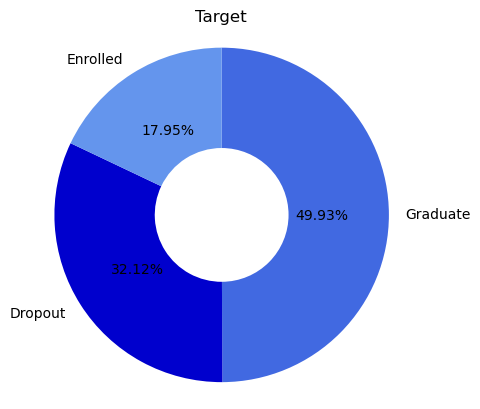

In [227]:
#plot a piechart to check the distribution of the Target variable
Target = df_clean['Target'].value_counts()
plt.pie(Target, labels = Target.index, startangle = 90, 
        counterclock = False,colors = ['royalblue', 'mediumblue', 'cornflowerblue'],
        autopct='%2.2f%%', wedgeprops = {'width' : 0.6})
plt.axis('square')
plt.title('Target');

According to the insight, approximately 50% of the students are Graduates.
The percentage of dropouts exceeds 30%.

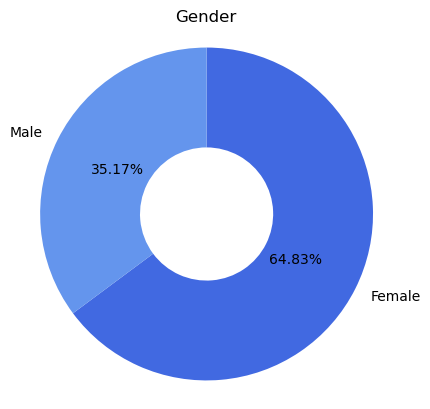

In [228]:
#plot a piechart to check the distribution of the Target variable
Gender = df_clean['Gender'].value_counts()
plt.pie(Gender, labels = Gender.index, startangle = 90, 
        counterclock = False,colors = ['royalblue', 'cornflowerblue'],
        autopct='%2.2f%%', wedgeprops = {'width' : 0.6})
plt.axis('square')
plt.title('Gender');

According to the insight, approximately 65% of the students are Females.

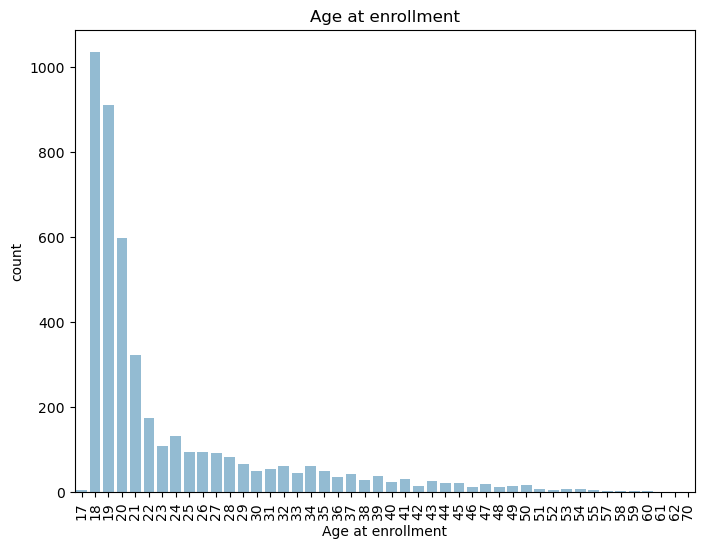

In [229]:
#check the age distribution of the students
data = df_clean['Age at enrollment'].value_counts()
plt.figure(figsize=[8, 6])
base_color = sns.color_palette("Blues")[2]
sns.countplot(data=df_clean, x='Age at enrollment', color = base_color);
plt.xticks(rotation=90);
plt.title('Age at enrollment');

I observed that most students enroll between the ages of 18 - 22, the rate of enrollment declined after at Age 23, then a slight increase at 24, after which a continous decline was observed.

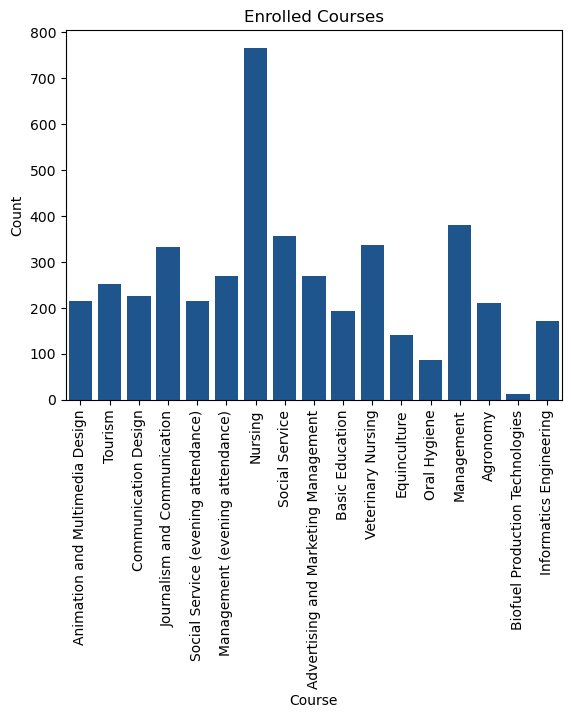

In [230]:
#check the distribution of the most enrolled courses
data = df_clean['Course'].value_counts()
sns.countplot(data= df_clean, x='Course', color = sns.color_palette("Blues")[5])
plt.xticks(rotation=90)
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Enrolled Courses');

The main enrolled course is Nursing, followed by Management(Daytime Attendance), social service (Daytime Attendance) and Veterinary Nursing. Oral Hygiene and Biofuel Production Technologies are the least enrolled courses.

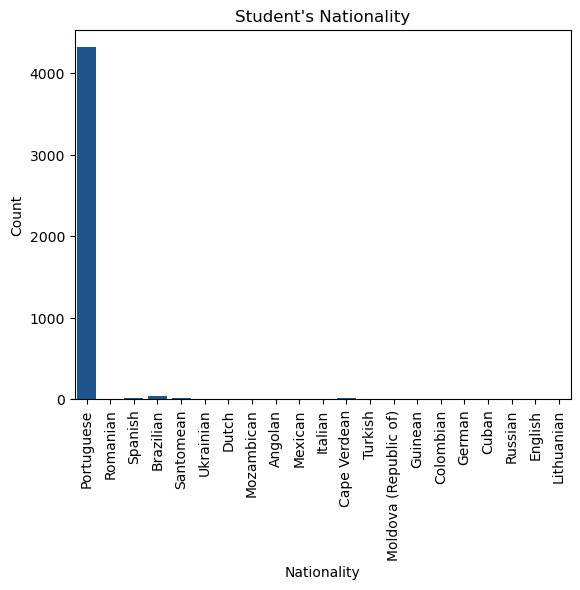

In [231]:
#check the nationality of each student
data = df_clean['Nationality'].value_counts()
sns.countplot(data= df_clean, x='Nationality', color = sns.color_palette("Blues")[5])
plt.xticks(rotation=90)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Student\'s Nationality');

Majority of the students are Portuguese.

### The investigation will be carried out based on 7 Factors

### Financial Factor

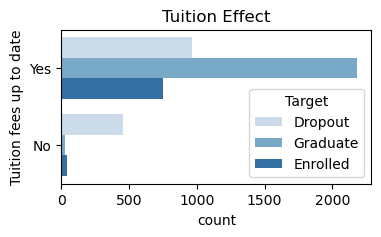

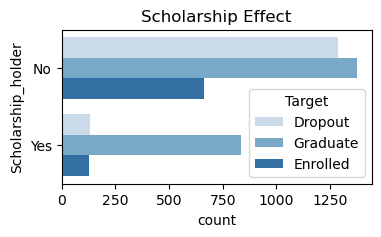

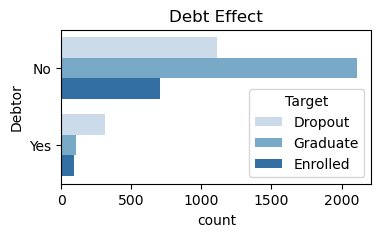

In [232]:
#check the relationship between tuition fee and target variable
plt.figure(figsize = [4, 2])
ax = sns.countplot(data = df_clean, y = 'Tuition_fees', hue = 'Target', palette = 'Blues')
ax.legend(title = 'Target')
plt.title('Tuition Effect')
plt.ylabel('Tuition fees up to date');

#check the relationship between scholarship holder and target variable
plt.figure(figsize = [4, 2])
ax = sns.countplot(data = df_clean, y = 'Scholarship_holder', hue = 'Target', palette = 'Blues')
ax.legend(title = 'Target')
plt.title('Scholarship Effect')
plt.ylabel('Scholarship_holder');

#check the relationship between Debtor and target variable
plt.figure(figsize = [4, 2])
ax = sns.countplot(data = df_clean, y = 'Debtor', hue = 'Target', palette = 'Blues')
ax.legend(title = 'Target')
plt.title('Debt Effect')
plt.ylabel('Debtor');

From the graph, It can be observed that students with Tuition fees up to date have a higher chance of graduating while student with Debts have a lower chance of graduating. It is also interesting to note that students without scholarship have a high chance of graduating and dropping out.

### Academic Factor

<Figure size 2000x1000 with 0 Axes>

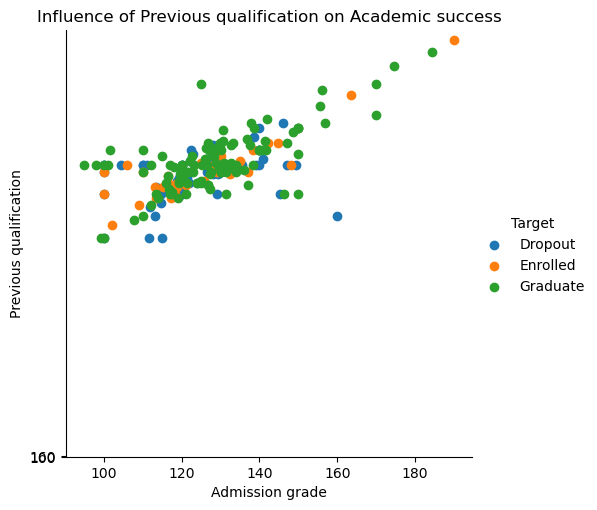

In [234]:
#plot a scatterplot of 3 variables
data = df_clean['Previous qualification (grade)'].value_counts()

np.random.seed(5)
sample = np.random.choice(df_clean.shape[0], 200, replace = False)
df_clean_subset = df_clean.reindex(sample)

plt.figure(figsize = [20,10])
g = sns.FacetGrid(data = df_clean_subset, hue = 'Target', height = 5);
g.map(plt.scatter, 'Admission grade', 'Previous qualification (grade)');
tick_props = np.arange(0.50, 1.05, 0.30)
tick_names = ['{:0.0f}'.format(v*200) for v in tick_props]
plt.yticks(tick_props, tick_names)
plt.xlabel('Admission grade')
plt.ylabel('Previous qualification')
plt.title('Influence of Previous qualification on Academic success')
g.add_legend(title = 'Target');

It can be observed that students who had high grades from previous qualification and admission grade has a higher chance of graduating.

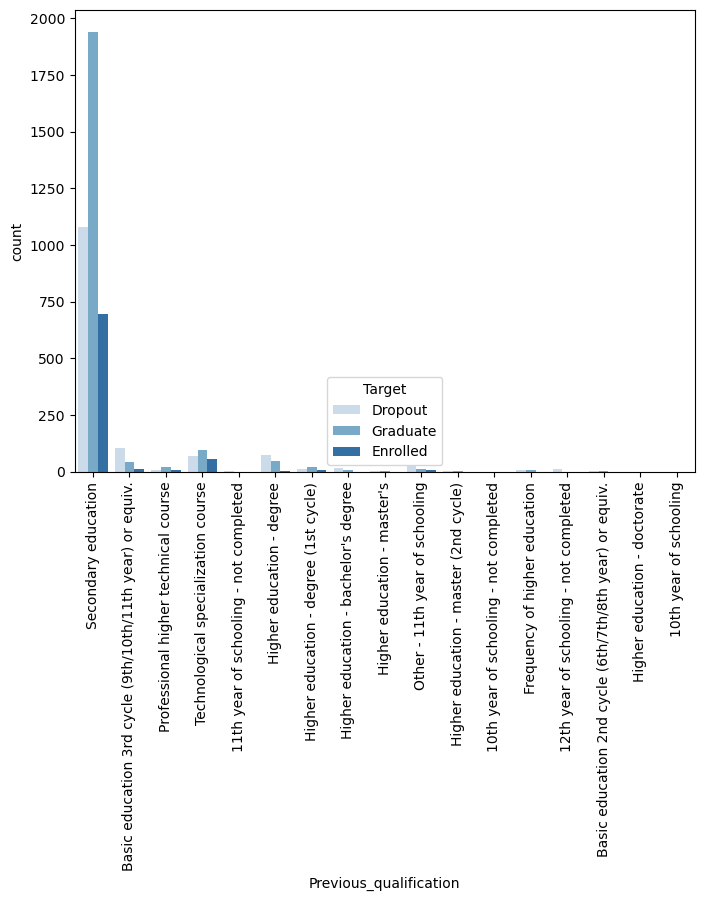

In [235]:
#Plot the categorical variables
plt.figure(figsize = [8, 6])

#plot 1: Previous_qualification vs. Target
sns.countplot(data = df_clean, x = 'Previous_qualification', hue ='Target' , palette = "Blues")
ax.legend(loc=2, ncol = 5, title='Target')
plt.xticks(rotation=90);

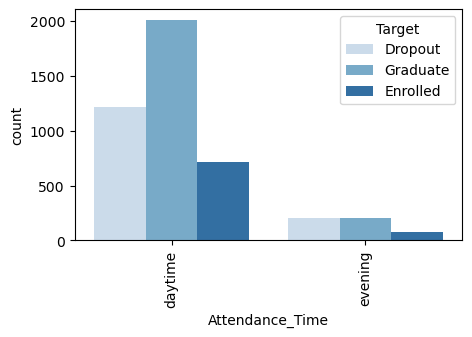

In [236]:
#plot 2: Attendance_Time vs Target
plt.figure(figsize = [5, 3])
sns.countplot(data = df_clean, x = 'Attendance_Time', hue = 'Target', palette ="Blues")
ax.legend(loc=2, ncol = 5, title="Target")
plt.xticks(rotation=90); 

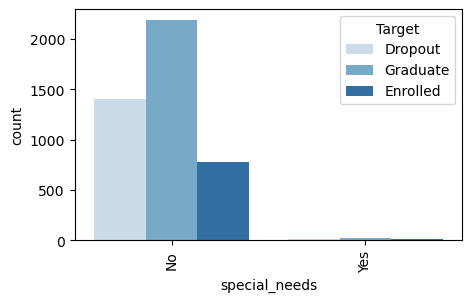

In [237]:
#plot 3: special_needs vs Target
plt.figure(figsize = [5, 3])
sns.countplot(data = df_clean, x = 'special_needs', hue = 'Target', palette = "Blues")
ax.legend(loc = 1, ncol = 4, title="Target");
plt.xticks(rotation=90);

According to the Academic Analysis, Secondary Education students with high previous qualification grade and academic grade enrolled in daytime learning with No special needs have a high chance of Academic success.

### Demographic Factor

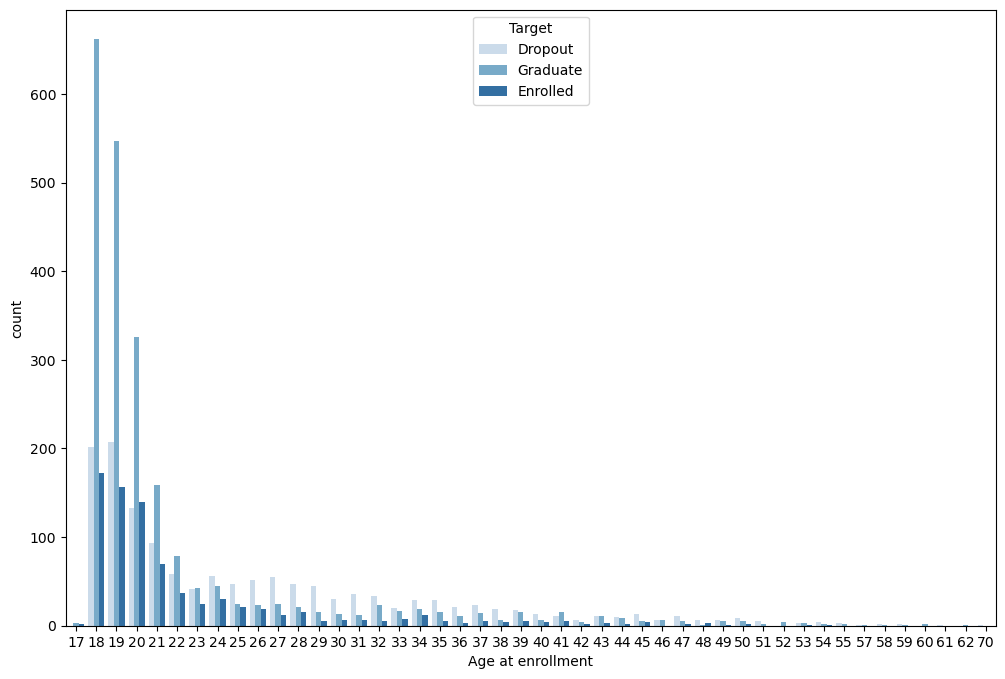

In [238]:
#check the relationship between the Target variables and students age distribution
plt.figure(figsize = [12, 8])
sns.countplot(data = df_clean, x = 'Age at enrollment', hue ='Target' , palette = "Blues")
ax.legend(loc=2, title='Target')

From the data, I observed that from age 18 - 23, there was a reccord of high graduate success with Age 18 being the highest followed by Age 19. I also noticed a very interesting insight, from Age 24 to Age 40, the Dropout rate was higher than the Graduate rate, then a slight change at Age 41 where graduate rate surpassed dropout.

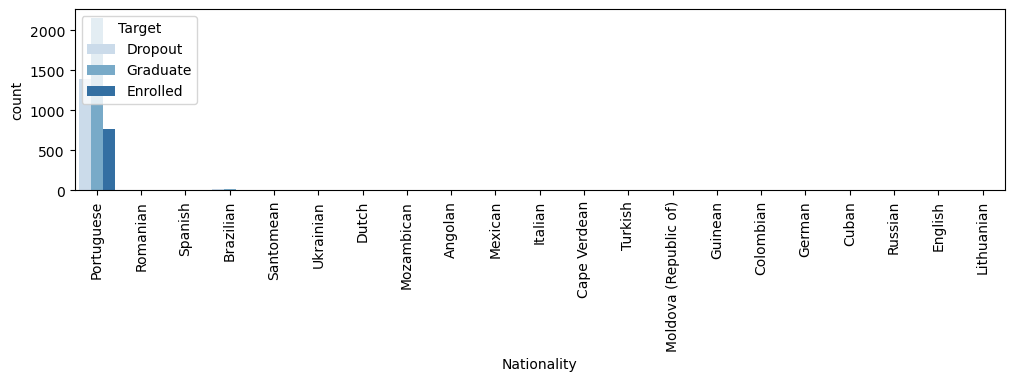

In [239]:
#Plot the categorical variables
plt.figure(figsize = [12, 8])
#plot 1: Nationality vs. Target
plt.subplot(3, 1, 1)
sns.countplot(data = df_clean, x = 'Nationality', hue ='Target' , palette = "Blues")
ax.legend(loc=2, ncol = 5, title='Target')
plt.xticks(rotation=90);

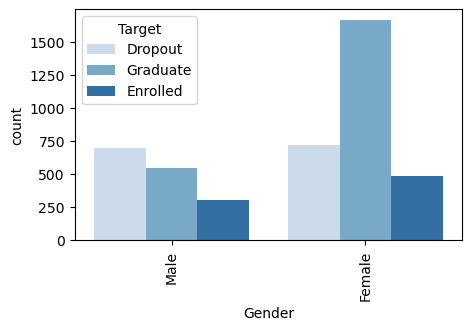

In [240]:
plt.figure(figsize = [5, 3])
#plot 3: Gender vs. Target
sns.countplot(data = df_clean, x = 'Gender', hue ='Target' , palette = "Blues")
ax.legend(loc=1, ncol = 2, title='Target')
plt.xticks(rotation=90);

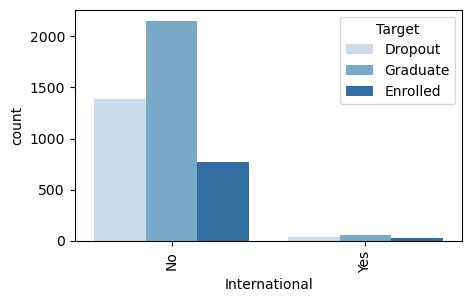

In [241]:
plt.figure(figsize = [5, 3])

#plot 4: International vs. Target
sns.countplot(data = df_clean, x = 'International', hue ='Target' , palette = "Blues")
ax.legend(loc=2, ncol = 2, title='Target')
plt.xticks(rotation=90);

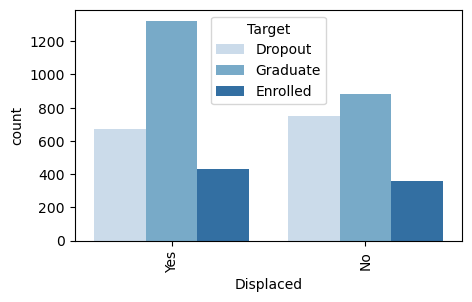

In [242]:
plt.figure(figsize = [5, 3])
#plot 5: Displaced vs. Target
sns.countplot(data = df_clean, x = 'Displaced', hue ='Target' , palette = "Blues")
ax.legend(loc=2, ncol = 2, title='Target')
plt.xticks(rotation=90);

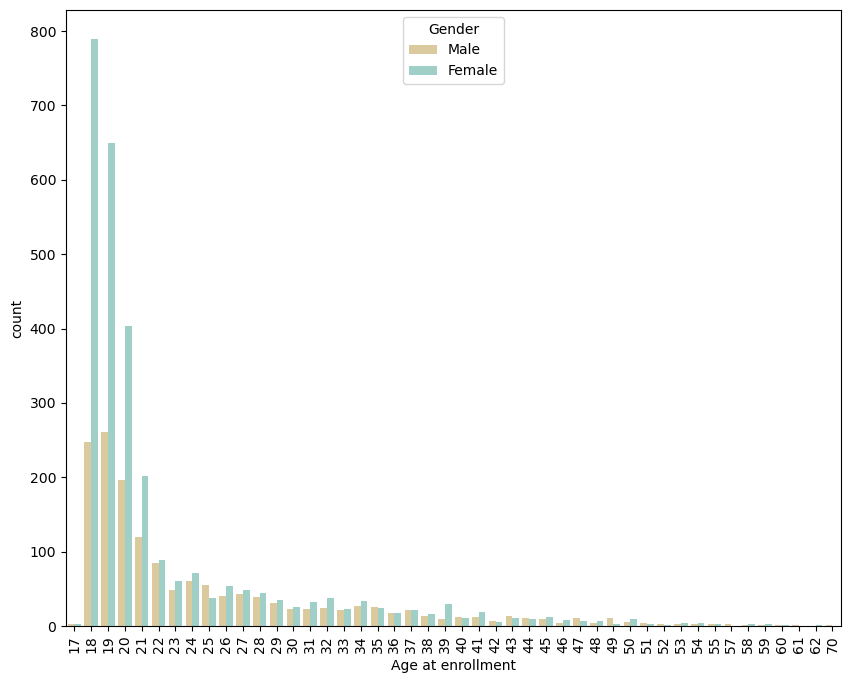

In [254]:
plt.figure(figsize = [10, 8])
#plot 5: Age at enrollment vs. Gender
sns.countplot(data = df_clean, x = 'Age at enrollment', hue ='Gender' , palette = "BrBG")
ax.legend(loc=2, ncol = 2, title='Gender')
plt.xticks(rotation=90);

According to the Demographic Analysis, I noticed that majority of academic success was recorded at Age 18 - 22, which happens to be majorly Females. While comparing Age and Gender, I noticed that majority of the gender at 25 are Males which also recorded a High dropout rate. It can be said that the Male students have more dropout rate compared to the female students.

### Enrollment Factor

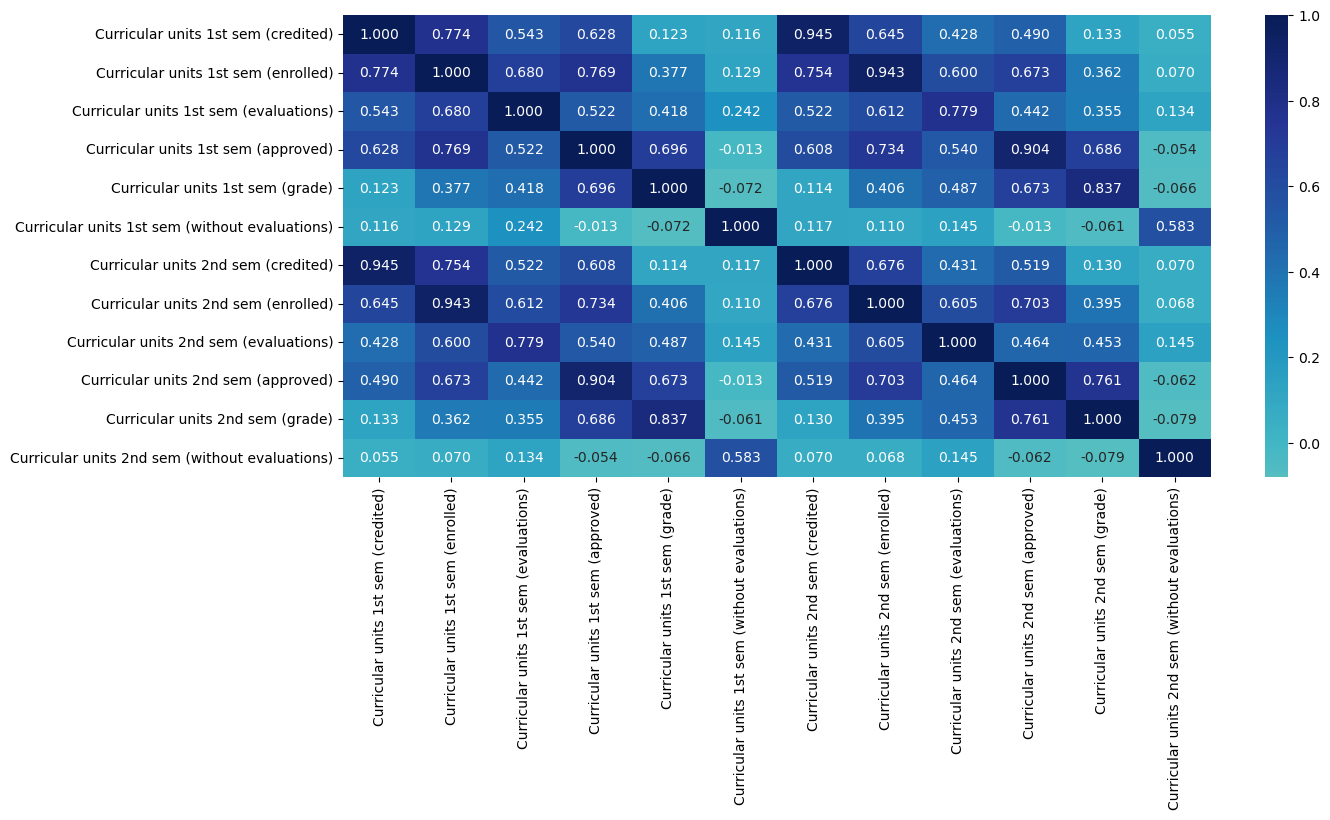

In [255]:
#Using a heat map to check for correlation
Curr_units = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
              'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
              'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
              'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
              'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
              'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']

#correlation between numerical variables
plt.figure(figsize = [14, 6])
sns.heatmap(df_clean[Curr_units].corr(), annot = True, fmt = '.3f',
           cmap = 'YlGnBu', center = 0);

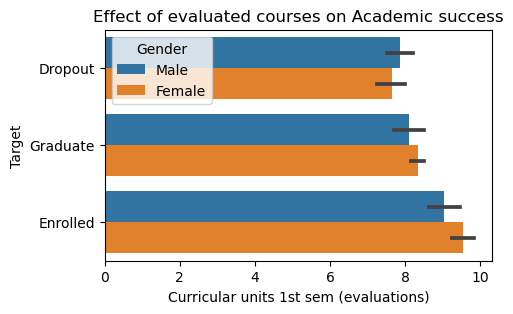

In [256]:
plt.figure(figsize = [5, 3])
sns.barplot(data = df_clean, x = 'Curricular units 1st sem (evaluations)', y = 'Target', hue = 'Gender')
plt.title('Effect of evaluated courses on Academic success')
plt.show()

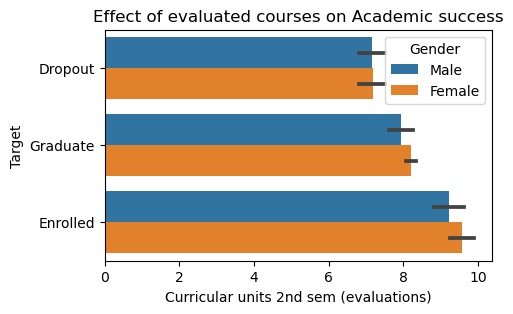

In [257]:
plt.figure(figsize = [5, 3])
sns.barplot(data = df_clean, x = 'Curricular units 2nd sem (evaluations)', y = 'Target', hue = 'Gender')
plt.title('Effect of evaluated courses on Academic success')
plt.show()

The Academic process takes 5 steps: Enrolled, Approved, Credited, Graded and Evaluated/Not Evaluated.
The Evaluation is the last phase of the academic process where feedback collected after the semester. The feedback can help educators improve the educational experience for future students. Here, in 1st semester there are more Male dropouts after evaluation, Also, in 2nd semester, Female students graduate more than the Male students.

### Socioeconomic Factor

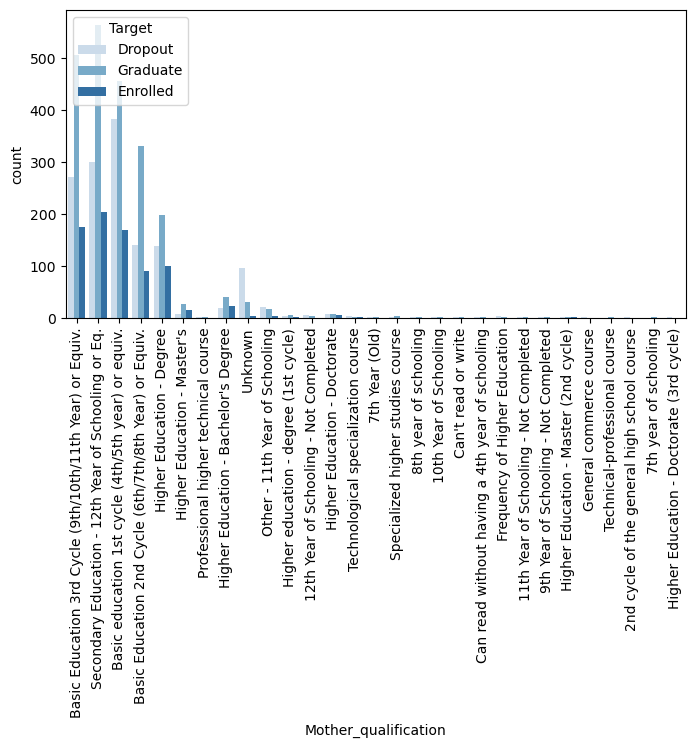

In [258]:
plt.figure(figsize = [8,4])

#check the relationship between Mother_qualification vs. Target
sns.countplot(data = df_clean, x = 'Mother_qualification', hue ='Target' , palette = "Blues")
ax.legend(loc=6, title='Target')
plt.xticks(rotation=90);

Students whose Mothers' have Basic Education, Secondary Education(12th) year, and Higher Education(Degree, Master's and Bachelor's) have higher chances of graduating while those with unknown qualification, secondary Education(11th year) have high chances of Dropping out.

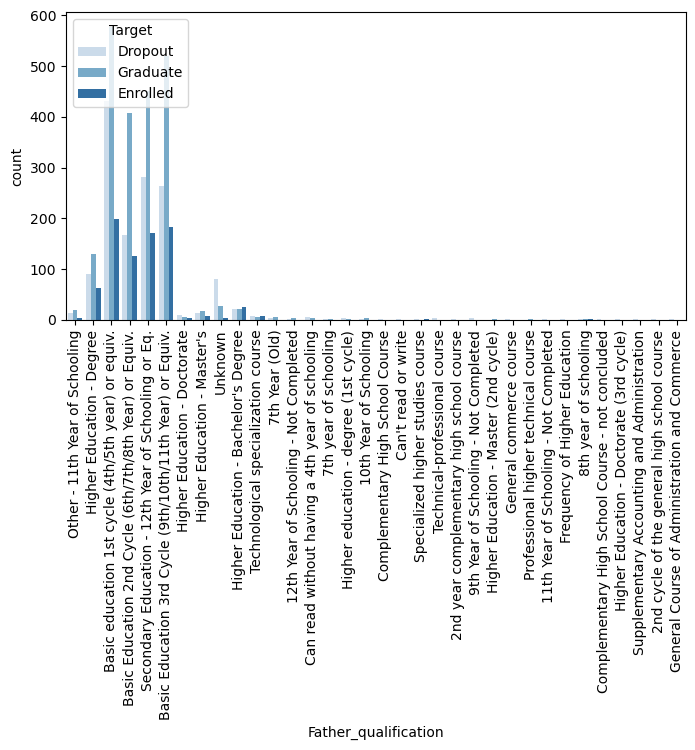

In [259]:
plt.figure(figsize = [8, 4])
#check the relationship between Father_qualification vs Target
sns.countplot(data = df_clean, x = 'Father_qualification', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

Students whose Fathers' have Basic Education, Secondary Education(12th) year, and Higher Education(Degree, Master's and Bachelor's) have higher chances of graduating while those with unknown qualification have high chances of Dropping out. 

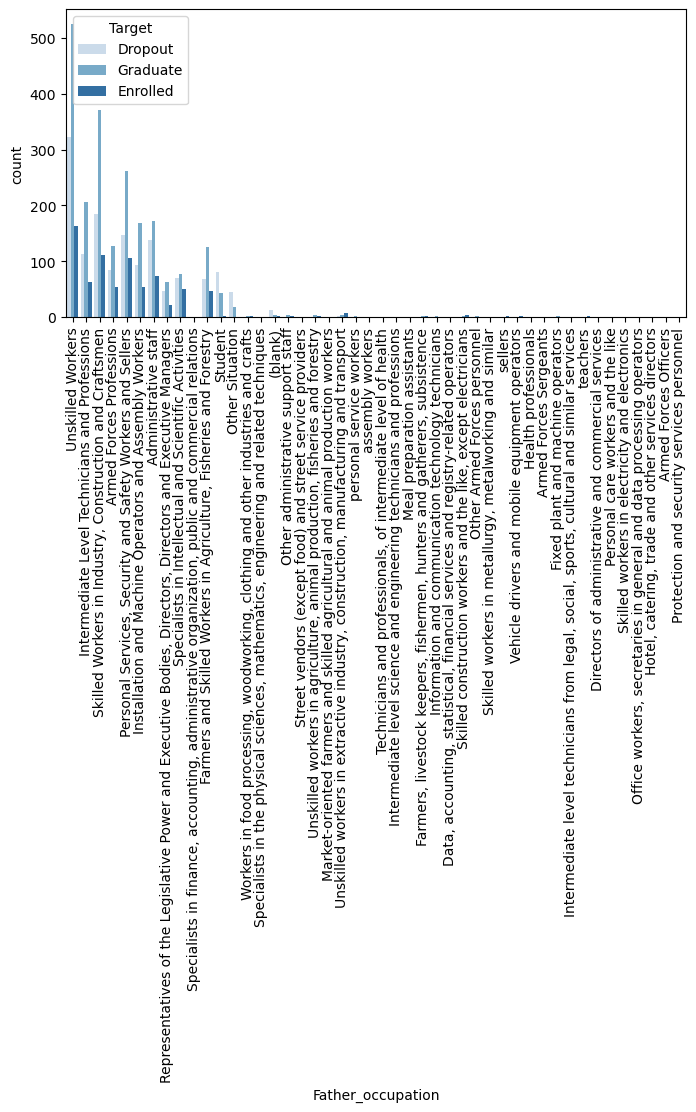

In [260]:
plt.figure(figsize = [8, 4])

#check the relationship between Father_occupation vs Target
sns.countplot(data = df_clean, x = 'Father_occupation', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

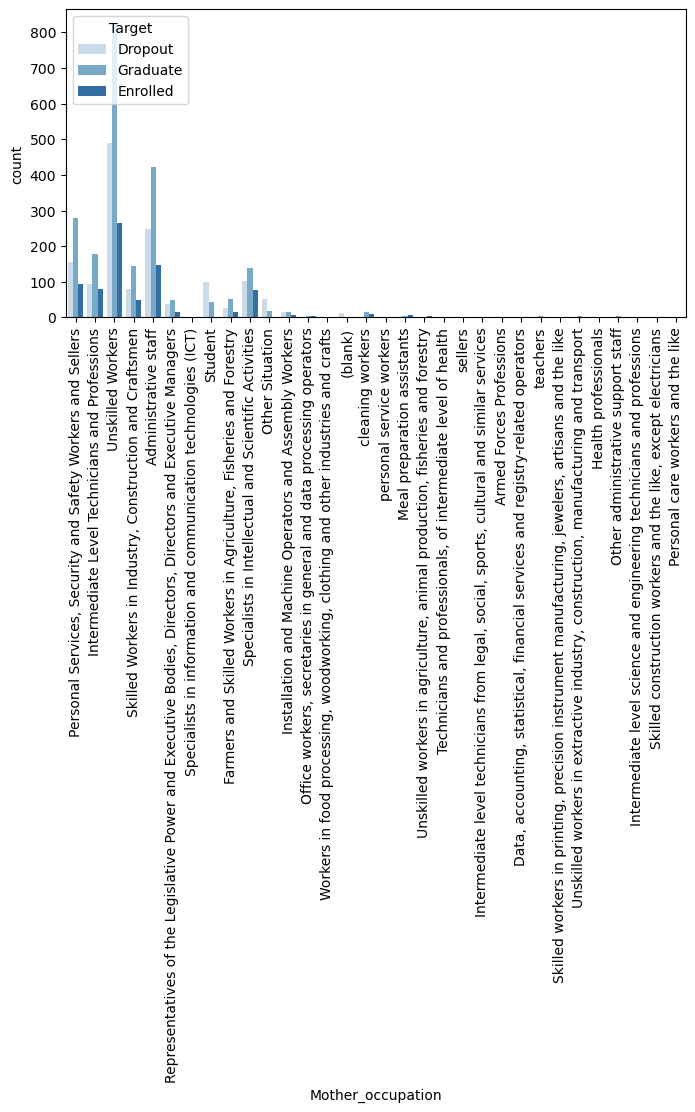

In [261]:
plt.figure(figsize = [8, 4])
#check the relationship between  Mother_occupation vs Target
sns.countplot(data = df_clean, x = 'Mother_occupation', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

Students whose parents are Students have higher chances of dropping out.

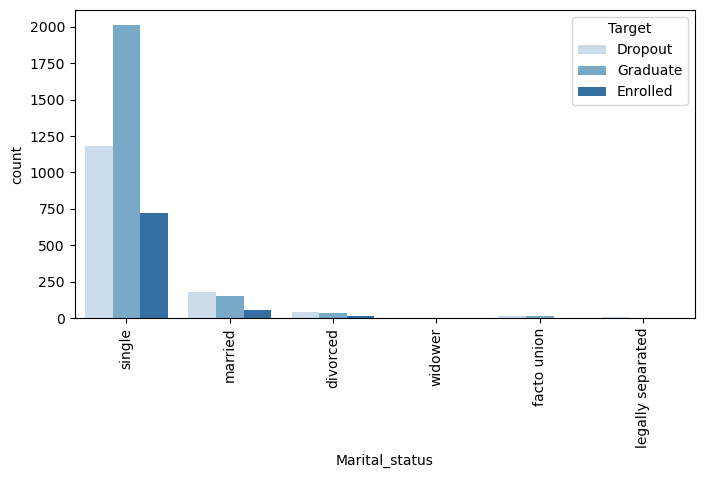

In [262]:
#check the relationship between Marital status and Target
plt.figure(figsize = [8, 4])
sns.countplot(data = df_clean, x = 'Marital_status', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

Majority of the Graduate students are Single, while Married students have a higher chance of dropping out.

### Macro-economic Factor

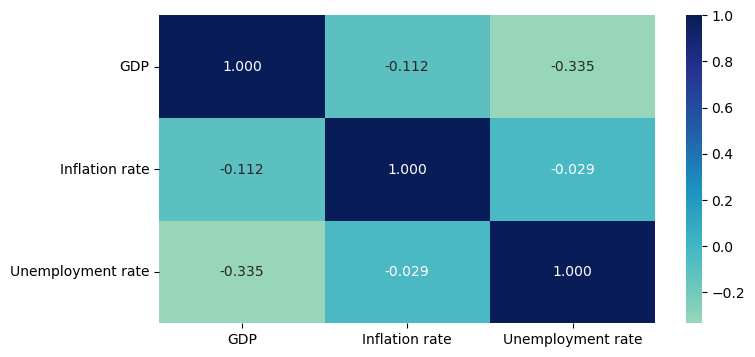

In [263]:
#Using a heat map to check for correlation
rate = ['GDP', 'Inflation rate', 'Unemployment rate']
#correlation between numerical variables
plt.figure(figsize = [8, 4])
sns.heatmap(df_clean[rate].corr(), annot = True, fmt = '.3f',
           cmap = 'YlGnBu', center = 0);

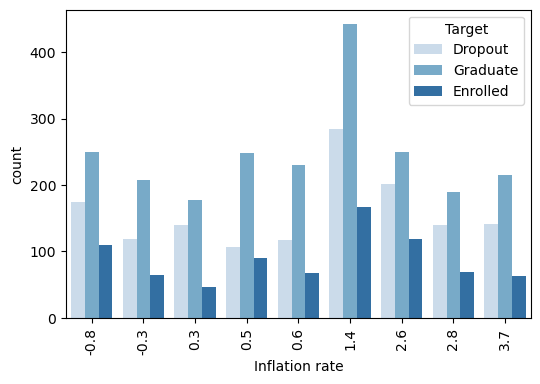

In [270]:
#check the relation between inflation rate and target
plt.figure(figsize = [6, 4])
sns.countplot(data = df_clean, x = 'Inflation rate', hue = 'Target', palette ="Blues")
ax.legend(loc=2, ncol = 5, title="Target")
plt.xticks(rotation=90); 

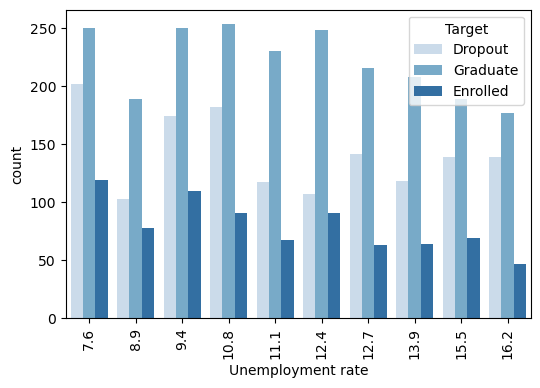

In [272]:
#check the relation between unemployment rate and target
plt.figure(figsize = [6, 4])
sns.countplot(data = df_clean, x = 'Unemployment rate', hue = 'Target', palette ="Blues")
ax.legend(loc=2, ncol = 5, title="Target")
plt.xticks(rotation=90); 

High Unemployment rate recorded the lowest graduate and enrollment. 
Surprisingly, the Low unemployment rate recorded a high dropout, graduate and enrollment.

### Application Factor

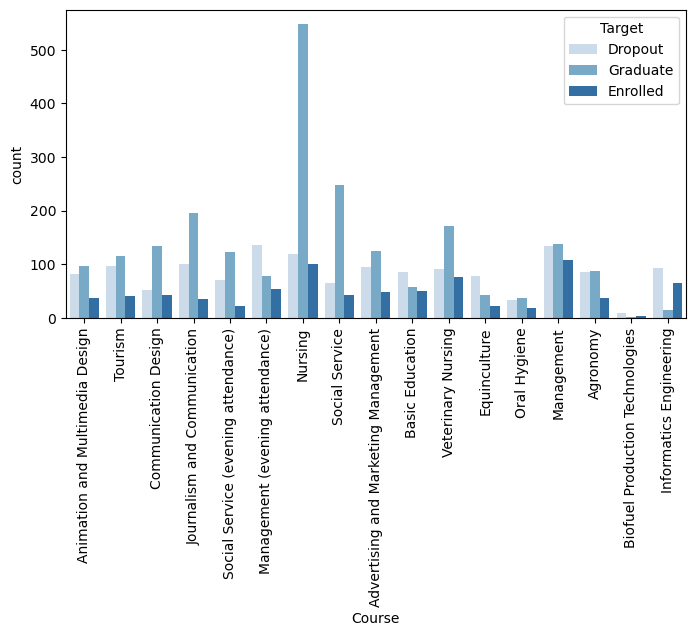

In [273]:
#check the relationship between Course and Target 
plt.figure(figsize = [8, 4])
sns.countplot(data = df_clean, x = 'Course', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

Nursing students recorded a significant high graduate rate, followed by social service. Management courses recorded high dropout rate. 

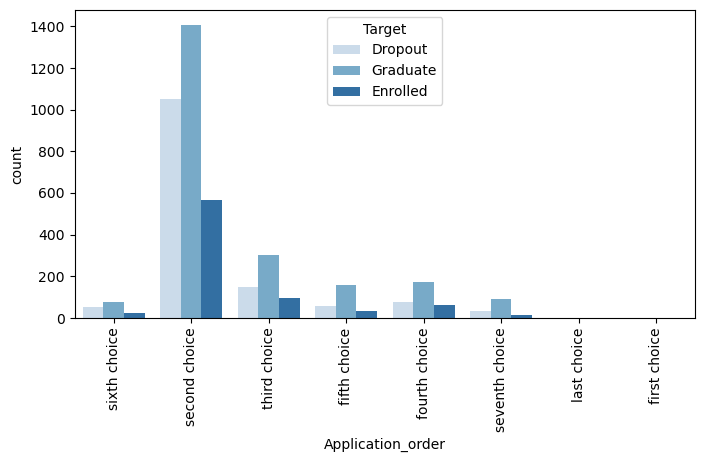

In [274]:
#check the relationship between Application order and Target 
plt.figure(figsize = [8, 4])
sns.countplot(data = df_clean, x = 'Application_order', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

Application order recorded  both high graduate and dropout rate 

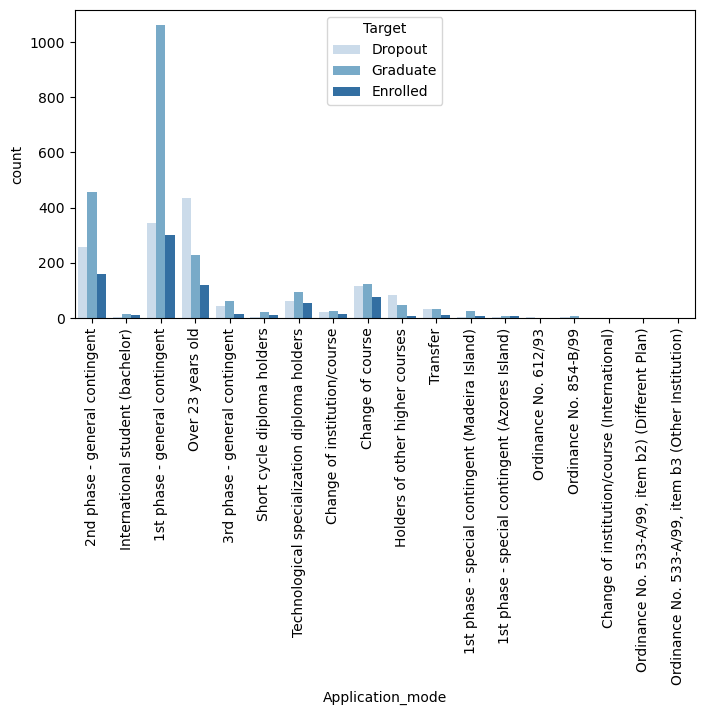

In [275]:
#check the relationship between Application mode and Target 
plt.figure(figsize = [8, 4])
sns.countplot(data = df_clean, x = 'Application_mode', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

Students who meet the general academic condition in the 1st phase have high graduate rate, followed by the 2nd phase - general contingent. The students over 23years old have high dropout rate, which correlates with the insight from Age distribution and target variable relationship.

# CONCLUSION

### The main feature of my analysis is to analyze the characteristics of variables that can be used to identify Dropout Occurrence.

### Main Findings

1. Financial Factor: Late tuition payment and presence of tuition debt can lead to Academic dropout.

2. Academic Factor: There is a high chance of Academic success when the student has High previous qualification and admission grade.

3. Demographic Factor: Male students recorded high dropout rate, and students above the Age of 23 have a higher chance of dropping out.

4. Enrollment Factor: The Academic process of each students recorded Strong Positive correlation. The final phase of an academic process which is the Evaluation phase recorded high dropout for the Male in 1st sem. and high graduate rate for the female in 2nd sem.

5. Socioeconomic Factor: Students whose parents are students and have unknown qualification have high chance of dropping out. Also, Married students have high dropout rate, while single students recorded high graduate rate.

6. Macroeconomic Factor: This had little to no effect on student academic success and dropout.

7. Application Factor: Students who meet the 1st phase general requirement have high graduate rate, while students above 23years old has high dropout rate. Also, Management courses recorded high dropout rate while Nursing redorded high graduate rate.

In [276]:
#save the clean and transformed dataset to a csv
df_clean.to_csv('Academic_Prediction_cleaned.csv')